In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

In [3]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [7]:
# Paso 1: Análisis exploratorio de los datos
# Cargar el dataset
ruta = r"C:\Users\Usuario\OneDrive\Documentos\Cursos UNAD\Cursos UNAD 5\ANÁLISIS DE DATOS\Anexo 6 - Dataset Titanic\Titanic-Dataset.csv"
data = pd.read_csv(ruta)

In [9]:
# Realizamos lectura de los Datos para el análisis exploratorio
data.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
# Inspección inicial
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

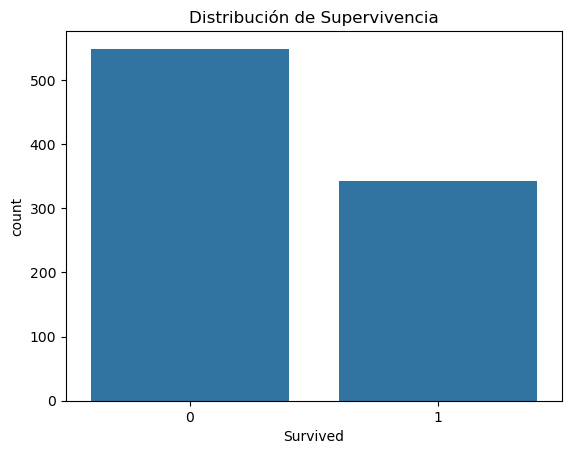

In [13]:
# Visualización de relaciones entre variables
sns.countplot(x="Survived", data=data)
plt.title("Distribución de Supervivencia")
plt.show()

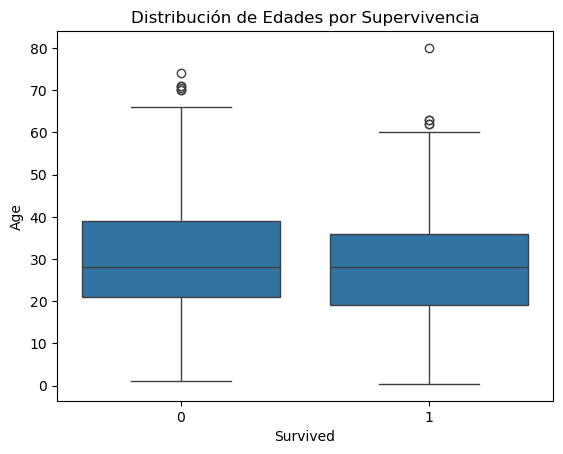

In [15]:
sns.boxplot(x="Survived", y="Age", data=data)
plt.title("Distribución de Edades por Supervivencia")
plt.show()

In [45]:
# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['number'])

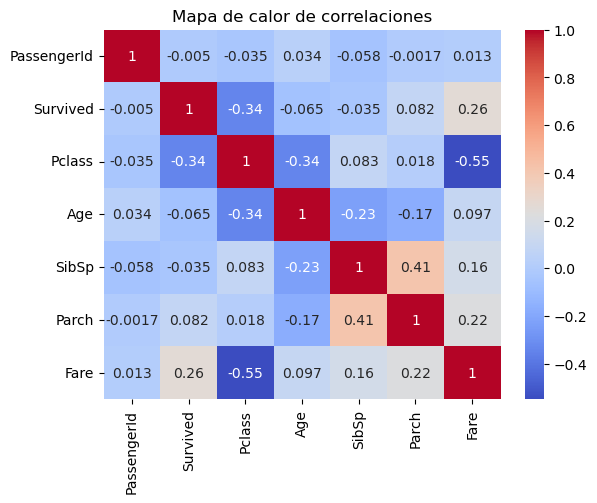

In [47]:
# Generar el mapa de calor de correlaciones
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de calor de correlaciones")
plt.show()

In [57]:
# Paso 2: Preprocesamiento de datos
# Verificar si hay valores faltantes
print("\nValores faltantes por columna:")
print(data.isnull().sum())


Valores faltantes por columna:
PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [21]:
# Transformación de variables categóricas
data = pd.get_dummies(data, columns=["Sex", "Embarked"], drop_first=True)

In [25]:
# Paso 3: Selección de características relevantes
features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_male", "Embarked_Q", "Embarked_S"]
X = data[features]
y = data["Survived"]

In [27]:
# Paso 4: División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Paso 5: Entrenamiento del modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
# Paso 6: Evaluación del modelo
y_pred = model.predict(X_test)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Matriz de confusión:
[[90 15]
 [19 55]]


In [33]:
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [37]:
# Cálculo de la curva ROC
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

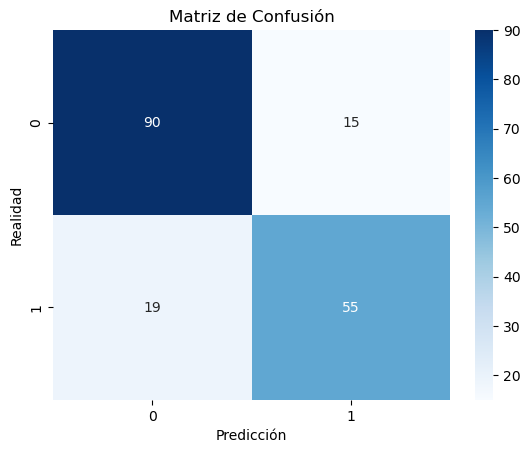

In [39]:
# Paso 7: Visualización de resultados
# Matriz de confusión como gráfico
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

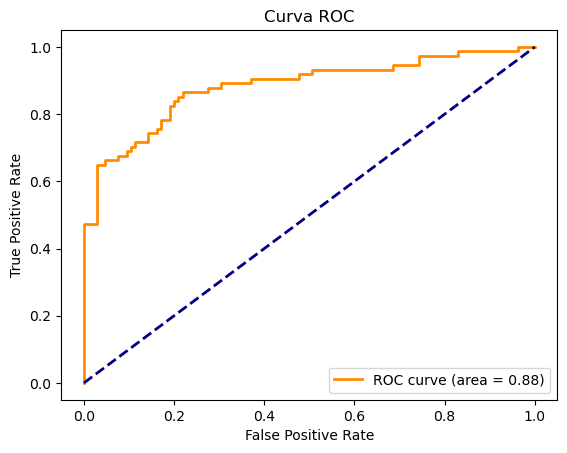

In [41]:
# Curva ROC
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

In [43]:
# Paso 8: Interpretación y análisis
print("El modelo muestra una precisión adecuada, con métricas claras en cuanto a precisión, recall y F1-score.")
print(f"El área bajo la curva ROC es {roc_auc:.2f}, lo que indica una buena capacidad predictiva del modelo.")

El modelo muestra una precisión adecuada, con métricas claras en cuanto a precisión, recall y F1-score.
El área bajo la curva ROC es 0.88, lo que indica una buena capacidad predictiva del modelo.
